Write a function:

def solution(A)

that, given an array A of N integers, returns the smallest positive integer (greater than 0) that does not occur in A.

For example, given A = [1, 3, 6, 4, 1, 2], the function should return 5.

Given A = [1, 2, 3], the function should return 4.

Given A = [−1, −3], the function should return 1.

Write an efficient algorithm for the following assumptions:

N is an integer within the range [1..100,000];
each element of array A is an integer within the range [−1,000,000..1,000,000].

In [15]:
def solution(A):
    A.sort()
    notinA =[]
    for i in range(min(A),max(A)+1):
        if i not in A:
            notinA.append(i)
    for i in notinA:
        if i <= 0:
            notinA.remove(i)
    
    notinA.sort()
    
    if len(notinA) == 1:
        return notinA[0]
    elif len(notinA) == 0 and A[-1] > 0:
        return max(A)+1
    elif len(notinA) == 0 and A[-1] < 0:
        return 1
    else:
        return sorted(notinA)[0]

In [12]:
testcases = {"i":[1,2,3], "j":[-1,-2]}
answer = {"i":4,"j":1}

In [13]:
for key, val in testcases.items():
    print(key, "expected", answer[key], "got", solution(val))

i expected 4 got 4
j expected 1 got 1


In [2]:
import random as rd
testcases = {
    "Test1":[1,1,3,4,6,2],
    "Test2":[1,2,3],
    "Test3":[-1.-3],
    "extremeSingle1":[1],
    "extremeSingle2":[-1],
    "extremeSingle3":[0],
    "Simple1":[99,0],
    "Simple2":[-5,3],
    "Xtreme1":[-10**5,10**5],
    "Xtreme2":[10,10**10],
    "posOnly1":[rd.randint(0,100) for _ in range(50)],
    "posOnly2":[rd.randint(101,200) for _ in range(100)],
    "NegOnly1":[-rd.randint(0,100) for _ in range(50)],
    "NegOnly2":[-rd.randint(101,200) for _ in range(100)],
    "Choatic1":[rd.randint(-100,200) for _ in range(10005)],
    "Choatic2":[rd.randint(1,40000) for _ in range(10005)],
    "Choatic3":[rd.choice([-1,1,2,3]) for _ in range(10005)],
}

answer = {
    "Test1":5,
    "Test2":4,
    "Test3":1,
    "extremeSingle1":2,
    "extremeSingle2":1,
    "extremeSingle3":1,
    "Simple1":1,
    "Simple2":1,
    "Xtreme1":1,
    "Xtreme2":11,
    "posOnly1":None,
    "posOnly2":None,
    "NegOnly1":None,
    "NegOnly2":None
    "Choatic1":None,
    "Choatic2":None,
    "Choatic3":4,
}

# Network Breach


you have a set of computers linked together in a network. you get edge lists of the network and a list identifying the breached devices. You need to make **ONE** cut in the network to separate the exposed devices from the rest of the network. If the cut creates a subset with less than two devices it is unacceptable. if no cuts can be made return -1. 

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [44]:
testCases = {
    "test1":[[(0, 4), (1, 3), (2, 0), (3, 0), (5, 1)],
             [False, True, False, False, False, True]]
    ,"test2":[[(0, 1), (1, 2), (2, 3), (2, 4)],
              [False, True, True, False, False]]
    ,"test3":[[(0,1),(1,2),(2,3),(3,4)],
              [False, False, True, False, False]]
    ,"test4":[[(0,1),(0,2),(1,3),(1,4),(2,5)],
              [True, False, False, False, False, False]]
    ,"test5":[[(0,1),(1,2),(2,3)],
              [False, True, False, True]]
    ,"test6":[[(0,1),(1,2),(1,3),(2,3)],
              [False, True, False, False]]
    ,"test7":[[(0,1),(1,2),(1,3),(2,3),(0,4)],
              [False, True, False, False, False]]
    ,"test8":[[(0,1),(1,2),(2,3),(3,0)],
              [True, False, False, False]]
}
# [(,),(,),(,),(,),(,)]


No Solution
{(0, 1): 1, (1, 2): None, (1, 3): None}


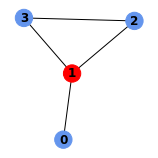

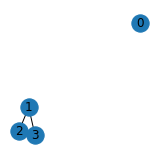

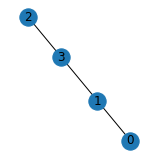

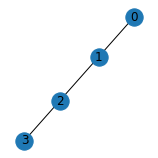

In [33]:
test = "test6"

edges = pd.DataFrame(testCases[test][0], columns = ["from", "to"])
nodes = pd.DataFrame({"breached":testCases[test][1]})
nodes.index.name = "nodes"
nodes["colours"] = ["red" if nodes.loc[node,"breached"] else "cornflowerblue" for node in list(nodes.index) ]

# create network instance
G = nx.from_pandas_edgelist(edges, 'from', 'to')

# reorder/reindex df to match network order
nodes = nodes.reindex(G.nodes())

# visualise network
plt.figure(figsize=[2,2])
nx.draw(G, with_labels=True, font_weight='bold', node_color = nodes["colours"])

# identify infected nodes
breached = nodes[nodes["breached"] == True].index.tolist()

# identify the posible cut off edges
options = {}
for edge in range(len(edges)):
    if edges["from"].iloc[edge] in breached and edges["to"].iloc[edge] in breached:
        pass
    elif edges["from"].iloc[edge] in breached or edges["to"].iloc[edge] in breached:
        options[tuple(edges.iloc[edge].tolist())] = None
    else:
        pass

# loop through options, delete the edge from network to inspect subsets and reset the graph to original to loop again
for option in options.keys():
    G.remove_edge(*option)

    plt.figure(figsize=[2,2])
    nx.draw(G, with_labels=True)

    # validate options where the subgraph produces no breached nodes


    subgraphs = list(G.subgraph(subgraph) for subgraph in nx.connected_components(G))

    # if loop available the cut would not create subnets
    if len(subgraphs) <= 1:
        G.add_edge(*option)
        continue

    for subgraph in range(len(subgraphs)):
        
        breached_sub = False
        for node in list(subgraphs[subgraph].nodes()): 
            if node in breached:
                breached_sub = True
                break
        if breached_sub:
            continue

        # calculate the number of nodes in the valid subgraphs
        else:
            options[option] = subgraphs[subgraph].number_of_nodes()  

    G.add_edge(*option)

# choose the option with largest number of nodes in the valid subgraph
best_save =  max([i for i in options.values() if i is not None])

if best_save is None :
    print("No Solution")
    pass
elif best_save <= 1:
    print("No Solution")
    pass
else:
    firewall = [option for option, saved in options.items() if saved == best_save]
    print("poosible cuts:", firewall)
    
print(options)

In [49]:
def apply_firewall(edge_list, breached, figures=[2,2]):
    """input edge_list as array of tuples and breached devices as list
    returns which edge should be deleted
    """
    
    # set up the data in df
    edges = pd.DataFrame(edge_list, columns = ["from", "to"])
    nodes = pd.DataFrame({"breached":breached})
    nodes.index.name = "nodes"
    nodes["colours"] = ["red" if nodes.loc[node,"breached"] else "cornflowerblue" for node in list(nodes.index) ]
    
    # create network instance
    G = nx.from_pandas_edgelist(edges, 'from', 'to')
    
    # reorder/reindex df to match network order
    nodes = nodes.reindex(G.nodes())
    
    # visualise network
    plt.figure(figsize=figures)
    nx.draw(G, with_labels=True, font_weight='bold', node_color = nodes["colours"])
    
    # identify infected nodes
    breached = nodes[nodes["breached"] == True].index.tolist()

    # identify the posible cut off edges
    options = {}
    for edge in range(len(edges)):
        if edges["from"].iloc[edge] in breached and edges["to"].iloc[edge] in breached:
            pass
        elif edges["from"].iloc[edge] in breached or edges["to"].iloc[edge] in breached:
            options[tuple(edges.iloc[edge].tolist())] = None
        else:
            pass
        
    # loop through options, delete the edge from network to inspect subsets and reset the graph to original to loop again
    for option in options.keys():
        G.remove_edge(*option)
        
#         plt.figure(figsize=figures)
#         nx.draw(G, with_labels=True)

        # validate options where the subgraph produces no breached nodes
        

        subgraphs = list(G.subgraph(subgraph) for subgraph in nx.connected_components(G))
        
        # if loop available the cut would not create subnets
        if len(subgraphs) <= 1:
            G.add_edge(*option)
            continue
        
        for subgraph in range(len(subgraphs)):
            breached_sub = False
            for node in list(subgraphs[subgraph].nodes()): 
                if node in breached:
                    breached_sub = True
                    break
            if breached_sub:
                continue
            
            # calculate the number of nodes in the valid subgraphs
            else:
                options[option] = subgraphs[subgraph].number_of_nodes()  

        G.add_edge(*option)

    # choose the option with largest number of nodes in the valid subgraph
    try:
        best_save =  max([i for i in options.values() if i is not None])
    except ValueError:
        best_save = None
        
    if best_save is None :
        print("No Solution")
        pass
    elif best_save <= 1:
        print("No Solution")
        pass
    else:
        firewall = [option for option, saved in options.items() if saved == best_save]
        print("poosible cuts:", firewall)

    return options

poosible cuts: [(1, 3)]


{(1, 3): 4}

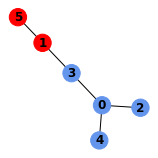

In [50]:
apply_firewall(testCases["test1"][0], testCases["test1"][1])

No Solution


{(0, 1): 1, (2, 3): 1, (2, 4): 1}

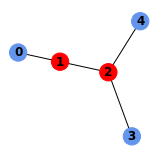

In [51]:
apply_firewall(testCases["test2"][0], testCases["test2"][1])

poosible cuts: [(1, 2), (2, 3)]


{(1, 2): 2, (2, 3): 2}

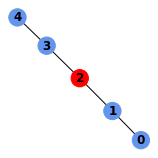

In [52]:
apply_firewall(testCases["test3"][0], testCases["test3"][1])

poosible cuts: [(0, 1)]


{(0, 1): 3, (0, 2): 2}

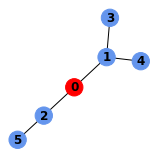

In [53]:
apply_firewall(testCases["test4"][0], testCases["test4"][1])

No Solution


{(0, 1): 1, (1, 2): None, (2, 3): None}

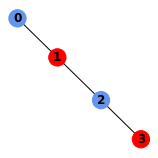

In [54]:
apply_firewall(testCases["test5"][0], testCases["test5"][1])

No Solution


{(0, 1): 1, (1, 2): None, (1, 3): None}

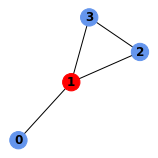

In [55]:
apply_firewall(testCases["test6"][0], testCases["test6"][1])

poosible cuts: [(0, 1)]


{(0, 1): 2, (1, 2): None, (1, 3): None}

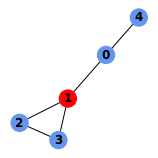

In [56]:
apply_firewall(testCases["test7"][0], testCases["test7"][1])

No Solution


{(0, 1): None, (3, 0): None}

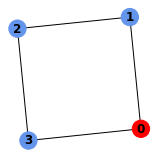

In [58]:
apply_firewall(testCases["test8"][0], testCases["test8"][1])